In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/sherv/Downloads/Elevate Labs/AI & ML Internship/Task 7/breast-cancer.csv")

In [3]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [4]:
df = df.drop(columns=['id'], errors='ignore')

In [5]:
if df['diagnosis'].dtype == 'object':
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Malignant = 1, Benign = 0

In [6]:
# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [9]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [10]:
# ----------- Linear SVM -----------
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [11]:
# Evaluate
print("Linear SVM Classification Report:")
print(classification_report(y_test, linear_svm.predict(X_test)))

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



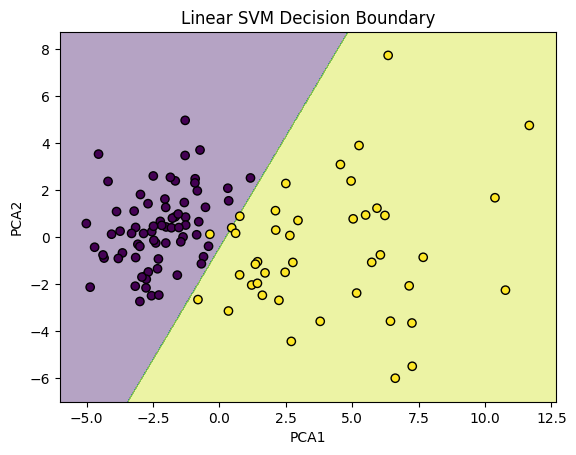

In [12]:
# Visualize decision boundary
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.show()

plot_decision_boundary(linear_svm, X_test, y_test, "Linear SVM Decision Boundary")

RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



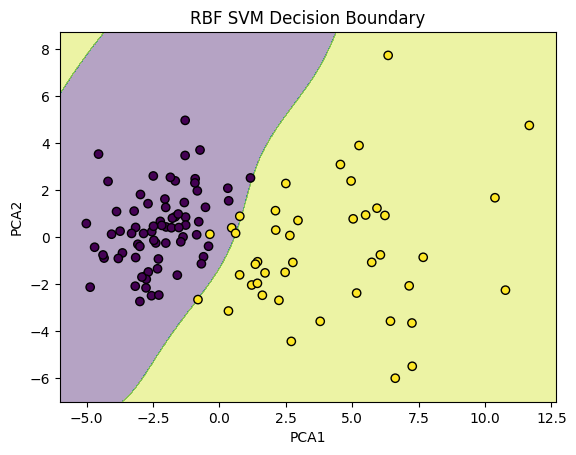

In [13]:
# ----------- RBF Kernel SVM -----------
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

print("RBF SVM Classification Report:")
print(classification_report(y_test, rbf_svm.predict(X_test)))

plot_decision_boundary(rbf_svm, X_test, y_test, "RBF SVM Decision Boundary")

In [14]:
# ----------- Hyperparameter Tuning -----------
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid.best_params_)
print("GridSearchCV Accuracy:", grid.score(X_test, y_test))

Best Parameters from GridSearchCV: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
GridSearchCV Accuracy: 0.9736842105263158


In [15]:
# ----------- Cross-Validation Score -----------
cv_scores = cross_val_score(grid.best_estimator_, X_pca, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.9122807  0.92105263 0.95614035 0.94736842 0.97345133]
Mean Accuracy: 0.9420586865393572
